In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from pprint import pprint

from functools import partial

import numpy as np
from sklearn.preprocessing import scale
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
import matplotlib.animation as ani

import mlgrad.models as models
import mlgrad.regr as regr
import mlgrad.cls as cls
import mlgrad.pca as pca
import mlgrad.plots as plots
import mlgrad.funcs as funcs
import mlgrad.funcs2 as funcs2
import mlgrad.loss as loss
import mlgrad.gd as gd
import mlgrad.smooth as smooth
import mlgrad.inventory as inventory
from mlgrad.af import averaging_function
import mlgrad.avragg as avragg

import rampy
import pybaselines
import random

from irsa import io
from irsa.preprocess import despike, utils
import irsa.widgets as widgets
import irsa.spectra as spectra
import irsa.io as io

import scipy.special as special

import copy

import ipywidgets
from IPython.display import display

import sys
print(sys.version)

# %matplotlib widget
# plt.ioff()

3.13.2 (main, Mar 13 2025, 14:29:07) [GCC 14.2.0]


In [2]:
d2 = spectra.SpectraCollection()
d2.load("/home/intellimath/work/spectra/spectra_SA_SS_SH", "ys-bs-1")
for key in d2:
    sp = d2[key]
    print(sp.key)

20250328_SA_95_R_more100_no_date_1_4_SE_
20250328_SH_15_no_date_more100_no_date_1_4_SE_
20250328_SS_17_no_date_more100_no_date_1_4_SE_


In [3]:
d2_keys = list(sorted(d2.keys()))
sel_i = 0
sel = ipywidgets.Dropdown(options=d2_keys,  description="Experiment:", rows=len(d2_keys)+1)
sel.layout.width="50%"

In [4]:
@ipywidgets.interact(key=sel)
def plot_spectra_for_key(key):
    entry = d2[key]
    entry.plot_spectra()

interactive(children=(Dropdown(description='Experiment:', layout=Layout(width='50%'), options=('20250328_SA_95…

In [177]:
# @ipywidgets.interact(key=sel)
# def plot_spectra_for_key(key):
#     entry = d2[key]
#     entry.select_baseline_param(tau2=1.0e5, bs_scale=2.5, d=2, func2_mode="e",
#                            ww=10, tau_smooth=100, n_iter=100, tol=1.0e-6,
#                            func=funcs.Step(20.0),
#                            # func2=inventory.relative_abs_max,
#                            override_tau2=True,
#                           )


interactive(children=(Dropdown(description='Experiment:', index=2, layout=Layout(width='50%'), options=('20250…

In [178]:
# for key in d2:
#     entry = d2[key]
#     entry.subtract_baselines(
#         d=2, func2_mode="e",
#         func=funcs.Step(20.0),
#         # func2=inventory.relative_abs_max,        
#     )
#     entry.replace_spectra_with_corrected()

FloatProgress(value=0.0, bar_style='success', description='20250328_SA_95_R_more100_no_date_1_4_SE_', max=27.0…

FloatProgress(value=0.0, bar_style='success', description='20250328_SH_15_no_date_more100_no_date_1_4_SE_', ma…

FloatProgress(value=0.0, bar_style='success', description='20250328_SS_17_no_date_more100_no_date_1_4_SE_', ma…

In [5]:
# for key in d2:
#     entry = d2[key]
#     entry.smooth(tau=10.0, func2=funcs.RectExp(w=10.0, p=1.0).evaluate_array)

In [5]:
# @ipywidgets.interact(key=sel)
def select_windows_for_key(key):
    entry = d2[key]
    entry.windows = [(1560.0,2690.0), (3010.0,3790.0)]
    entry.smooth_by_windows(windows=entry.windows, tau=100)
    # entry.select_windows()

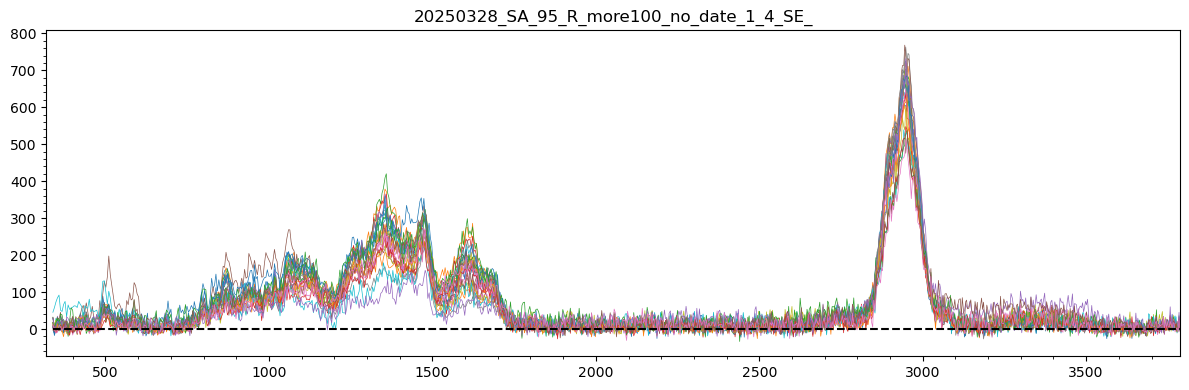

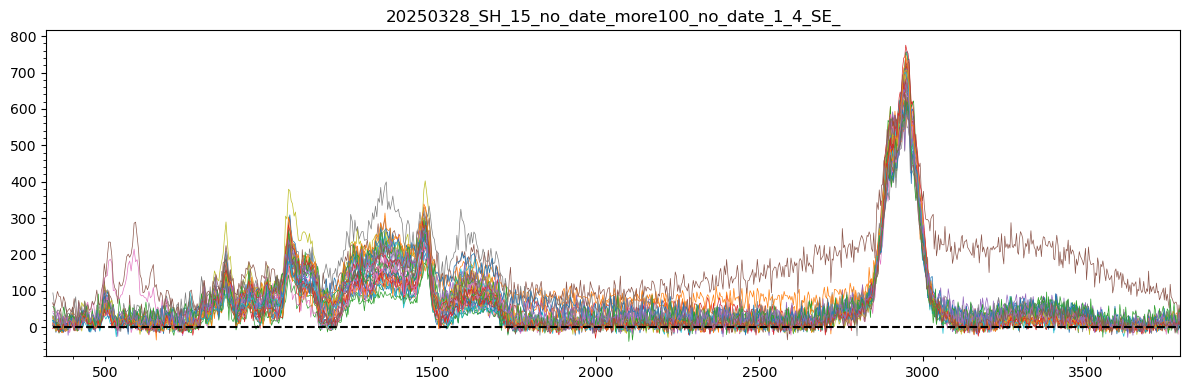

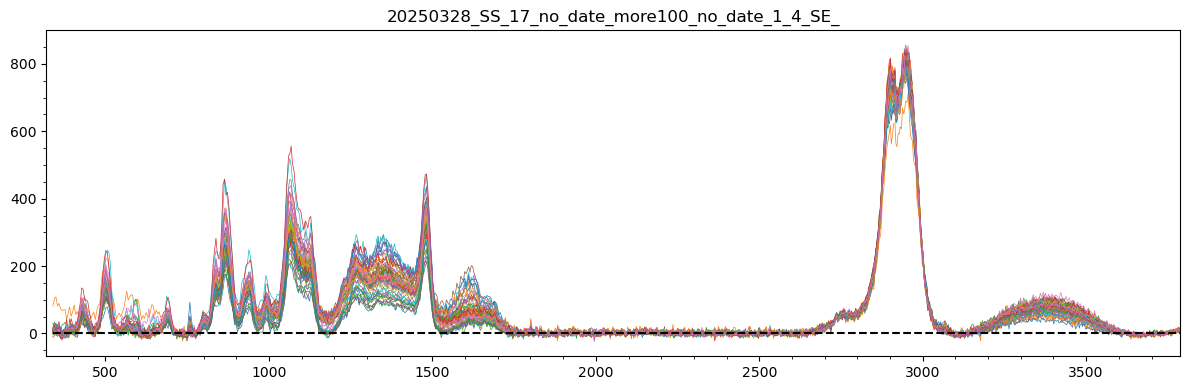

In [6]:
for i, key in enumerate(d2):
    entry = d2[key]
    plt.figure(figsize=(12,4))
    plt.title(key)
    xs = entry.x
    Ys = entry.y
    for ys in Ys:
        plt.plot(xs, ys, linewidth=0.5)
    plt.hlines(0, min(xs), max(xs), colors='k', linestyles='--')
    plt.xlim(min(xs)-20, max(xs))
        
    plt.minorticks_on()
    plt.tight_layout()
    # plt.legend()
    plt.show()


In [13]:

# @ipywidgets.interact(key=sel)
# def plot_spectra_for_key(key):
#     entry = d2[key]
#     entry.select_baselines(tau2=1.0e6, bs_scale=4.0, d=2, func2_mode="d",
#                            ww=10, tau_smooth=100, n_iter=100, tol=1.0e-6,
#                            func=funcs.Step(30.0),
#                            # func2=func2,
#                            override_tau2=True
#                           )


interactive(children=(Dropdown(description='Experiment:', layout=Layout(width='50%'), options=('20250328_SA_95…

In [11]:
# for key in d2:
#     entry = d2[key]
#     ### entry.ys_bs = entry.y - entry.bs    
#     entry.subtract_selected_baselines()

In [12]:
# for i, key in enumerate(d2):
#     entry = d2[key]
#     entry.replace_spectra_with_corrected()

In [185]:
# d2.save("/home/intellimath/work/spectra/spectra_SA_SH_SS", "ys-bs-1")

outliers: 0
outliers: 0
SA: err=0.00
SS: err=0.02


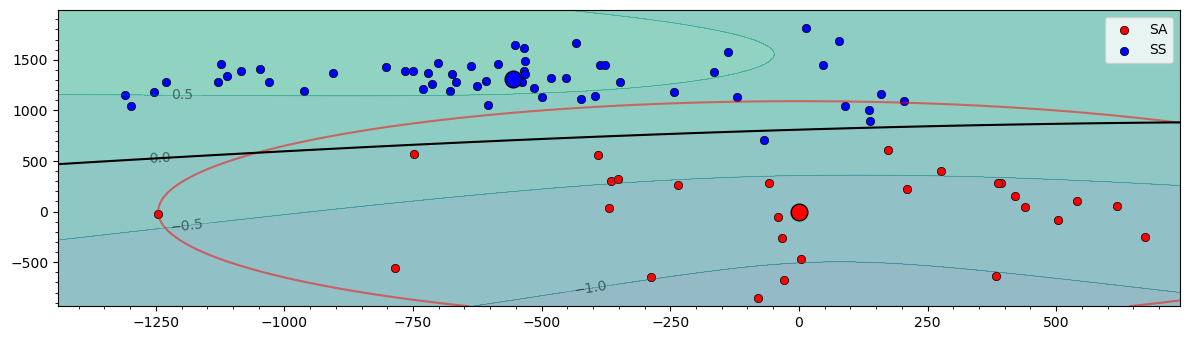

outliers: 0
outliers: 0
SS: err=0.02
SH: err=0.06


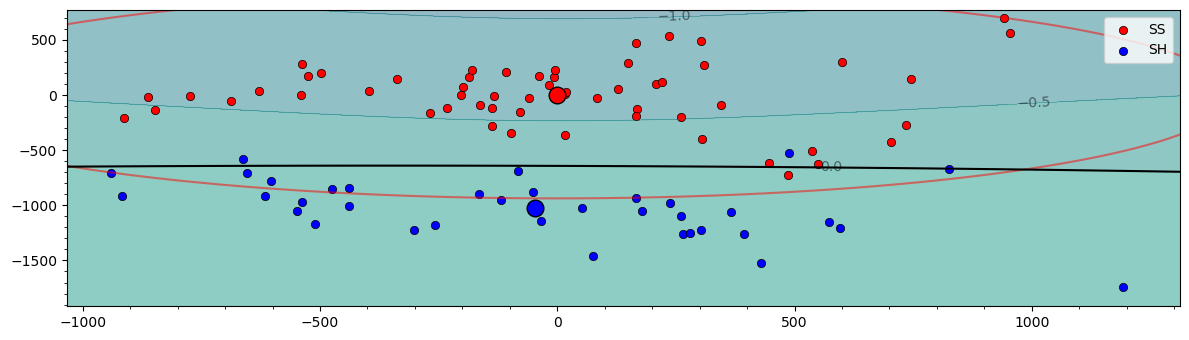

outliers: 0
outliers: 0
SA: err=0.26
SH: err=0.39


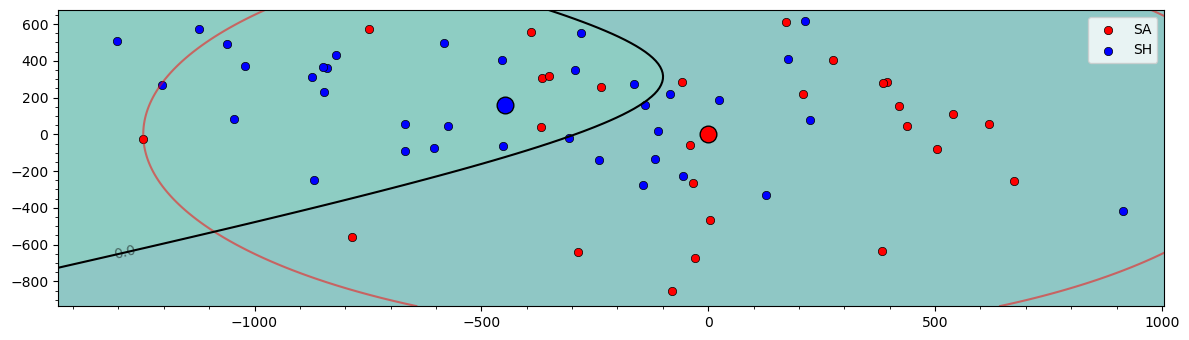

In [10]:
from irsa.analytics.pca import pca_compare_2d, find_robust_loc_and_pc_2d

ysSA = np.concatenate(
    tuple(d2.select_y_by_attr_value("вид_бактерий", "SA")), axis=0)
ysSS = np.concatenate(
    tuple(d2.select_y_by_attr_value("вид_бактерий", "SS")), axis=0)
ysSH = np.concatenate(
    tuple(d2.select_y_by_attr_value("вид_бактерий", "SH")), axis=0)


pca_compare_2d(ysSA, ysSS, "SA", "SS", 1.0, normalize_S=False)
pca_compare_2d(ysSS, ysSH, "SS", "SH", 1.0, normalize_S=False)
pca_compare_2d(ysSA, ysSH, "SA", "SH", 1.0, normalize_S=False)


In [ ]:
pca_robust_compare_2d(ysSA, ysSS, "SA", "SS", 1.0, normalize_S=False)
pca_compare_2d(ysSS, ysSH, "SS", "SH", 1.0, normalize_S=False)
pca_compare_2d(ysSA, ysSH, "SA", "SH", 1.0, normalize_S=False)


In [11]:
import mlgrad.models as models
import mlgrad.funcs as funcs
import mlgrad.funcs2 as funcs2
import mlgrad.loss as loss

import mlgrad.cls as cls
import mlgrad.af as af

zsSA = np.ones(ysSA.shape[0], "d")
zsSS = np.ones(ysSS.shape[0], "d")
zsSH = np.ones(ysSH.shape[0], "d")

# print(ys36.shape, zs36.shape)
# print(ys95.shape, zs95.shape)

ys_SA_SH = np.concatenate((ysSA,ysSH), axis=0)
ys_SH_SS = np.concatenate((ysSH,ysSS), axis=0)
ys_SA_SS = np.concatenate((ysSA,ysSS), axis=0)
zs_SA_SH = np.concatenate((zsSA,-zsSH), axis=0)
zs_SH_SS = np.concatenate((zsSH,-zsSS), axis=0)
zs_SA_SS = np.concatenate((zsSA,-zsSS), axis=0)


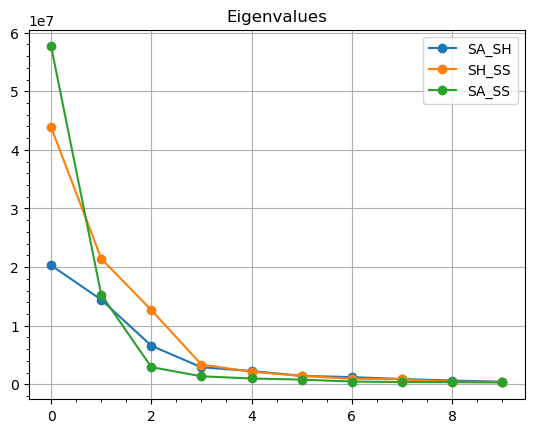

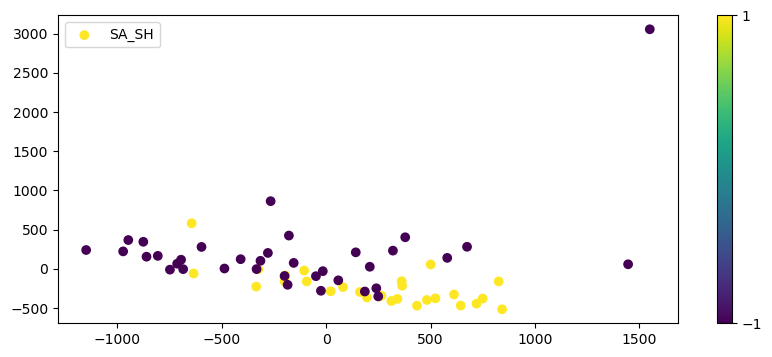

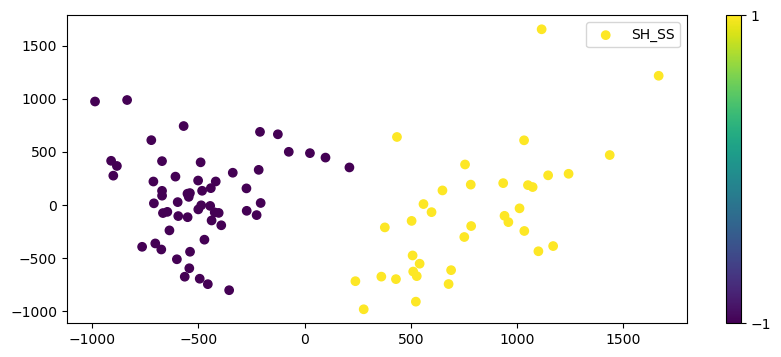

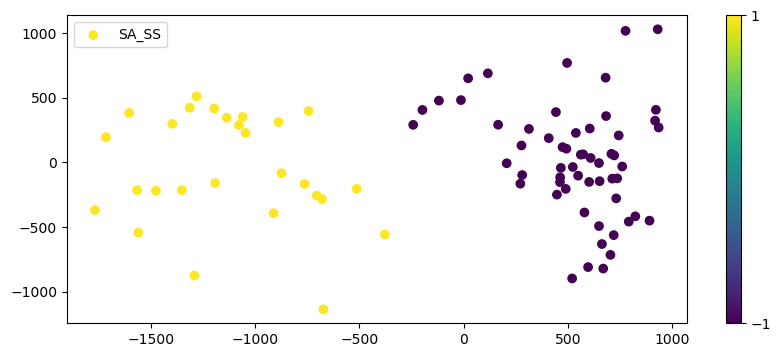

In [43]:
c1, A1, L1 = pca.find_loc_and_pc(ys_SA_SH, n=10)
c2, A2, L2 = pca.find_loc_and_pc(ys_SH_SS, n=10)
c3, A3, L3 = pca.find_loc_and_pc(ys_SA_SS, n=10)

U_SA_SH = (ys_SA_SH - c1) @ A1.T
# S1 = np.linalg.inv(U1.T @ U1)
# S1 /= np.sqrt(np.linalg.det(S1))

U_SH_SS = (ys_SH_SS - c2) @ A2.T
# S2 = np.linalg.inv(U2.T @ U2)
# S2 /= np.sqrt(np.linalg.det(S2))

U_SA_SS = (ys_SA_SS - c3) @ A3.T
# S3 = np.linalg.inv(U3.T @ U3)
# S3 /= np.sqrt(np.linalg.det(S3))

plt.title("Eigenvalues")
plt.plot(L1, marker='o', label="SA_SH")
plt.plot(L2, marker='o', label="SH_SS")
plt.plot(L3, marker='o', label="SA_SS")
plt.legend()
plt.minorticks_on()
plt.grid(1)
plt.show()

plt.figure(figsize=(10,4))
cs = plt.scatter(U_SA_SH[:,0], U_SA_SH[:,1], c=zs_SA_SH, label="SA_SH")
plt.colorbar(cs, ticks=[-1,1])
plt.legend()
plt.show()
plt.figure(figsize=(10,4))
cs = plt.scatter(U_SH_SS[:,0], U_SH_SS[:,1], c=zs_SH_SS, label="SH_SS")
plt.colorbar(cs, ticks=[-1,1])
plt.legend()
plt.show()
plt.figure(figsize=(10,4))
cs = plt.scatter(U_SA_SS[:,0], U_SA_SS[:,1], c=zs_SA_SS, label="SA_SS")
plt.colorbar(cs, ticks=[-1,1])
plt.legend()
plt.show()

In [45]:

# print(ys.shape, zs.shape)

# body = models.FFNetworkModel()
# body.add(models.LinearLayer(ys.shape[1], 100))
# body.add(models.ScaleLayer(funcs.Logistic(1.0), 100))
# head = models.LinearModel(100)
# nnmod = models.FFNetworkFuncModel(head, body)
# nnmod.allocate()
# nnmod.init_param()

mod_SA_SH = models.SigmaNeuronModel(funcs.Sigmoidal(1.0), U_SA_SH.shape[1])
mod_SA_SH.allocate()
mod_SA_SH.init_param()

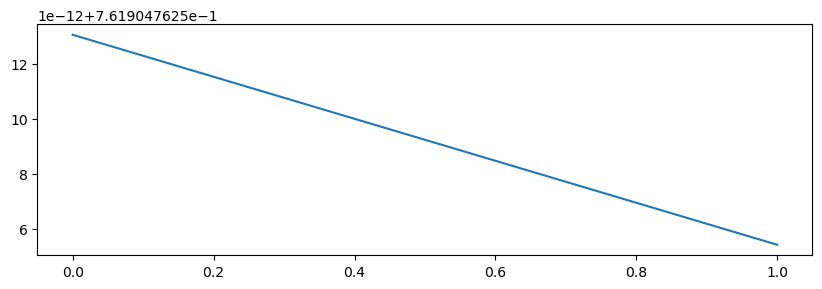

0.6031746031746031


In [47]:
alg_SA_SH = cls.classification_as_regr(U_SA_SH, zs_SA_SH, mod_SA_SH, #regnorm=funcs2.AbsoluteNorm(),
                                 # normalizer=gd.Masked(mod_SA_SH.n_param, 1.0e-5), 
                                 h=0.001, tau=0.001, n_iter=5000)

plt.figure(figsize=(10,3))
plt.plot(alg_SA_SH.lvals)
plt.show()

from sklearn.metrics import accuracy_score
print(accuracy_score(zs_SA_SH, np.sign(mod_SA_SH.evaluate(ys_SA_SH))))

-0.2888213530179133


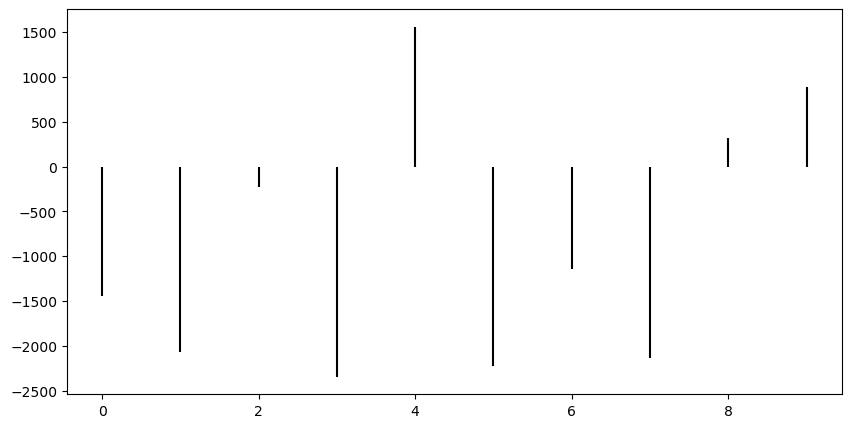

In [50]:
param_SA_SH = np.asarray(mod_SA_SH.param[1:])
print(param_SA_SH[0])
param_SA_SH_p = param_SA_SH.copy()
param_SA_SH_m = param_SA_SH.copy()
param_SA_SH_p[param_SA_SH < 0] = 0
param_SA_SH_m[param_SA_SH > 0] = 0
plt.figure(figsize=(10,5))
# plt.plot(ysSA.mean(axis=0), label="SA")
# plt.plot(ysSH.mean(axis=0), label="SH")
plt.vlines(range(U_SA_SH.shape[1]), 5000*param_SA_SH_m, 5000*param_SA_SH_p, color='k')
plt.show()

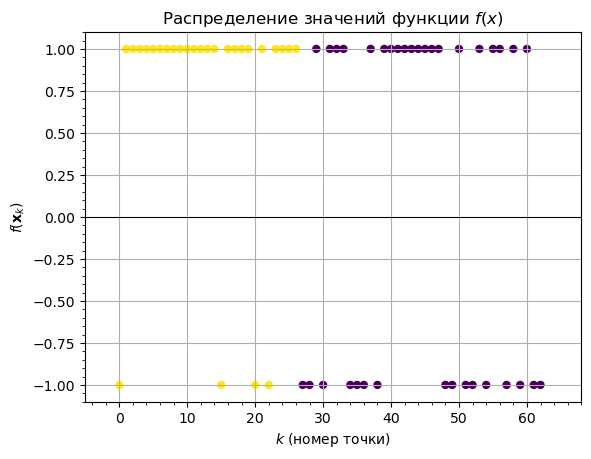

In [51]:
plots.plot_cls_function(mod_SA_SH, U_SA_SH, zs_SA_SH)

In [41]:
algs = []
mods = []
scores = []
for k in range(44):
    mod = models.SigmaNeuronModel(funcs.Sigmoidal(1.0), ys_SA_SH.shape[1])
    mod.allocate()
    mod.init_param()
    alg = cls.classification_as_regr(ys, zs, mod, regnorm=funcs2.AbsoluteNorm(),
                                     normalizer=gd.Masked(mod.n_param, 1.0e-5), 
                                     h=0.005, tau=0.05, n_iter=5000)
    score = accuracy_score(zs, np.sign(mod.evaluate(ys)))
    if score < 0.8:
        continue
    scores.append(score)        
    algs.append(alg)
    mods.append(mod)

print(len(mods))
print(scores)

NameError: name 'zs' is not defined

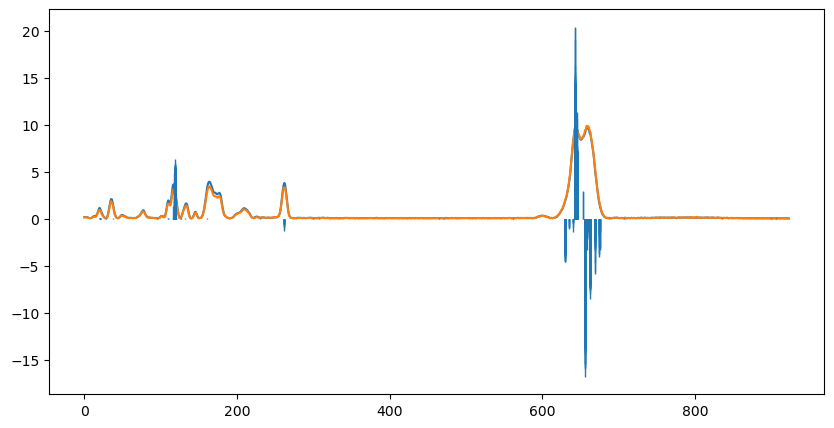

In [68]:
plt.figure(figsize=(10,5))
plt.plot(ys36.mean(axis=0), label="36")
plt.plot(ys95.mean(axis=0), label="95")
for mod in mods:
    param = np.asarray(mod.param[1:])
    # print(param[0])
    param_p = param.copy()
    param_m = param.copy()
    param_p[param < 0] = 0
    param_m[param > 0] = 0
    plt.vlines(range(ys.shape[1]), 10*param_m, 10*param_p, linewidth=1.0)
plt.show()

In [146]:
mod2 = models.SigmaNeuronModel(funcs.Sigmoidal(1.0), ysBC.shape[1])
mod2.allocate()
mod2.init_param()

In [75]:
def vote_alg(mods, scores, x):
    y = sum([score*mod.evaluate_one(x) for score, mod in zip(scores, mods)])
    if y > 0:
        y = 1.0
    elif y < 0:
        y = -1.0
    else:
        y = 0.0
    return y

In [77]:
zs_p = [vote_alg(mods, scores, y) for y in ys]
accuracy_score(zs_p, zs)

0.9310344827586207

In [78]:
zsBC_p = [vote_alg(mods, scores, y) for y in ysBC]
accuracy_score(zsBC_p, zsBC)

0.502092050209205

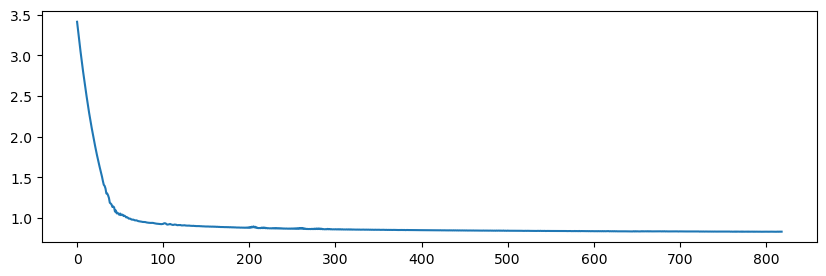

0.7112970711297071


In [147]:
alg2 = cls.classification_as_regr(ysBC, zsBC, mod2, regnorm=funcs2.AbsoluteNorm(),
                                 normalizer=gd.Masked(mod.n_param, 1.0e-5), 
                                 h=0.01, tau=0.01, n_iter=5000)

plt.figure(figsize=(10,3))
plt.plot(alg2.lvals)
plt.show()

from sklearn.metrics import accuracy_score
print(accuracy_score(zsBC, np.sign(mod2.evaluate(ysBC))))

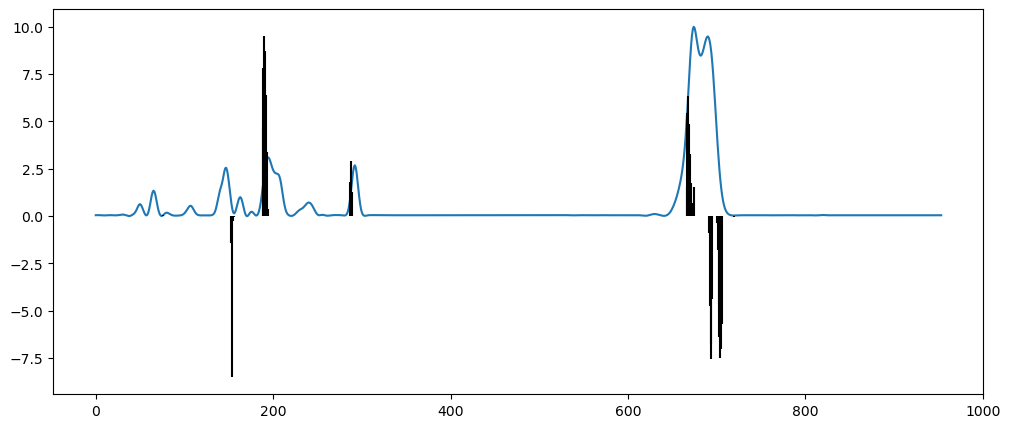

In [150]:
param2 = np.asarray(mod2.param[1:])
param2_p = param2.copy()
param2_m = param2.copy()
param2_p[param2 < 0] = 0
param2_m[param2 > 0] = 0
plt.figure(figsize=(12,5))
plt.plot(ysBC.mean(axis=0))
plt.vlines(range(ysBC.shape[1]), 10*param2_m, 10*param2_p, color='k')
plt.show()

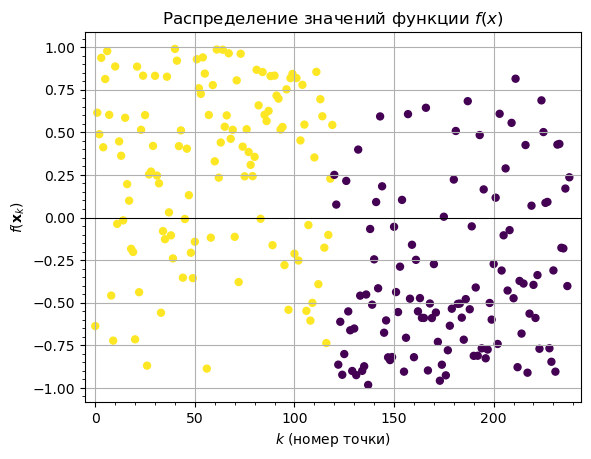

In [149]:
plots.plot_cls_function(mod2, ysBC, zsBC)

In [ ]:
# from mlgrad.pca import location, find_pc_all, find_pc_l1_all, find_pc_smoothed_all

# plt.figure(figsize=(10,5))
# for i, key in enumerate(d2):
#     entry = d2[key]
#     Xs, Ys = entry.x, entry.y

#     C = location(Ys)
#     C = smooth.whittaker_smooth(C, tau2=1.0)
#     # As, Ls, Us = find_pc_all(Ys - C, 2)
#     As2, Ls2, Us2 = find_pc_smoothed_all(Ys - C, 10, tau=1.0)
#     # print(As2)
#     # plt.plot(Ls, marker='o', label=key)
#     plt.figure(figsize=(12,4))
#     # plt.plot(Ls_r, marker='o', label=key)
#     # plt.scatter(Us[0], Us[1], label=key)
#     plt.plot(As2[0], label=key+"-0")
#     plt.plot(As2[1], label=key+"-1")
#     plt.plot(As2[2], label=key+"-2")
#     plt.legend()
#     plt.show()

#     plt.scatter(Us2[0], Us2[1], label=key)
#     plt.tight_layout()
#     plt.legend()
#     plt.show()
#     plt.figure()
#     plt.scatter(Us2[1], Us2[2], label=key)
#     plt.tight_layout()
#     plt.legend()
#     plt.show()


In [ ]:
plt.plot(Ls1, marker='o', label='pca')
plt.plot(Ls2, marker='o', label='pca smoothed')
plt.grid()
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12,5))
for i, A in enumerate(As1[:3]):
    plt.plot(A, label=str(i+1))
plt.legend()
plt.show()
plt.figure(figsize=(12,5))
for i, A in enumerate(As2[:3]):
    plt.plot(A, label=str(i+1))
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
for i, key in enumerate(d2):
    entry = d2[key]
    Xs, Ys = entry.x, entry.y

    # if "_R_" in key:
    #     if "95" in key:
    #         color='r'
    #     elif "96" in key:
    #         color='Brown'
    # elif "_S_" in key:
    #     if "92" in key:
    #         color='m'
    #     elif "93" in key:
    #         color='b'
    #     else:
    #         color='b'

    if "_R_" in key:
        color='r'
    elif "_S_" in key:
        color='b'
    else:
        color='m'
        
    # plt.plot(np.mean(Xs, axis=0), np.mean(Ys, axis=0), linewidth=1.0, color=color, label=key)
    plt.plot(np.mean(Ys, axis=0), linewidth=1.0, label=key)
    
# plt.hlines(0, 0, len(Ys[0]), colors='k')
# plt.xlim(-10,1000)
        
plt.minorticks_on()
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
import sympy
from sympy import MatrixSymbol, Identity, latex

In [ ]:
from IPython.display import display, Latex

In [ ]:
def latex_matrix(DD):
    n = DD.shape[0]
    s = r"$$\left(\begin{array}{" + n*"l" + "}"
    for i in range(10):
        for j in range(10):
            s += latex(DD[i,j])
            if j < n-1:
                s += r"&"
            else:
                s += r"\\"
    s += r"\end{array}\right)$$"
    # print(s)
    return s

In [ ]:
E = np.eye(10, dtype="i")
D2 = np.diff(E, 2, axis=0)
print(D2)
print(D2.T @ D2)

In [ ]:
w2 = sympy.symarray("w", (10,), )
W2 = np.diag(w2[0:-2])

In [ ]:
DD2 = np.dot(np.dot(D2.T, W2), D2)

In [ ]:
display(Latex(latex_matrix(DD2)))

In [ ]:
D1 = np.diff(np.eye(10, dtype="i"), 1, axis=0, )
print(D1)
print(D1.T @ D1)

In [ ]:
w = sympy.symarray("w", (10,))
W = np.diag(w[:-1])
DD1 = np.dot(np.dot(D1.T, W), D1)

In [ ]:
display(Latex(latex_matrix(DD1)))

In [ ]:
D3 = np.diff(np.eye(10, dtype="i"), 3, axis=0, )
print(D3)
print(D3.T @ D3)

In [ ]:
w3 = sympy.symarray("w", (10,), )
W3 = np.diag(w3[0:-3])

In [ ]:
DD3 = np.dot(np.dot(D3.T, W3), D3)

In [ ]:
display(Latex(latex_matrix(DD3)))

In [ ]:
D4 = np.diff(np.eye(10, dtype="i"), 4, axis=0, )
print(D4)
print(D4.T @ D4)

In [ ]:
w4 = sympy.symarray("w", (10,), )
W4 = np.diag(w4[0:-4])

In [ ]:
DD4 = np.dot(np.dot(D4.T, W4), D4)

In [ ]:
display(Latex(latex_matrix(DD4)))

In [ ]:
import ipywidgets as widgets
import os, time

In [ ]:
buttons = []
for i in range(10):
    buttons.append(widgets.Button(description=f"  The button {i}  "))
box = ipywidgets.Box(buttons)
box.layout = widgets.Layout(flex_flow="row wrap")
box

In [ ]:
fp = widgets.FloatProgress(min=0, max=10, value=0, bar_style="success", description="abcdefghijklmnopqrstuv")
fp.style.width=32
display(fp)
for i in range(11):
    time.sleep(1)
    fp.value=i